# (a-p)間の距離のヒストグラムを確認する

## 必要なパーツ
- 各モデルにおける埋め込みベクトル
    - PATH/TO/MODEL/gallery.txt
    - PATH/TO/MODEL/query.txt
- 実際の画像のパス
    - ./test_pairs.txt
- それぞれはインデックスで整合性をとる   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from tqdm import tqdm

In [2]:
# model = 'DualImpL2300a0.1b0.05'
# model = 'Dual300a0.1'
model = 'test'

In [6]:
ALPHA = 0.1
BETA = 0.05

In [7]:
vec_length = 500
model_epoch = 99

In [8]:
model_PATH = './model/T_Shirt/Dual_exp/a{}b{}'.format(ALPHA,BETA)
# model_PATH = './model/T_Shirt/tripletloss/a{}'.format(ALPHA)

In [9]:
f = open(model_PATH+'/{}/gallery{}.txt'.format(vec_length,model_epoch),'rb')
gallery = pickle.load(f)
print(gallery.shape)

(2032, 500)


In [10]:
f = open(model_PATH+'/{}/query{}.txt'.format(vec_length,model_epoch),'rb')
query = pickle.load(f)
print(query.shape)

(2032, 500)


In [11]:
# f = open('./model/T_Shirt/tripletloss/a0.1/300/gallery300.txt','rb')
# gallery = pickle.load(f)
# print(gallery.shape)

In [12]:
# f = open('./model/T_Shirt/tripletloss/a0.1/300/query300.txt','rb')
# query = pickle.load(f)
# print(query.shape)

## ユークリッド距離(の2乗)

In [13]:
def euclid_dist2(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [14]:
ave_sim_negative = []
for i,q in enumerate(query):
    sum_ = 0
    for j,g in enumerate(gallery):
        if i == j: continue
        else: sum_ += euclid_dist2(q,g)
    ave_sim_negative.append(sum_/len(gallery))

In [15]:
sim = []
for q,g in zip(query,gallery):
    sim.append(euclid_dist2(q,g))

In [16]:
gap = np.array(ave_sim_negative)-np.array(sim)

In [17]:
def plothist(sim1,sim2,model):
# bins =　棒の数
    #     plt.hist(sim,bins=40)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(sim1, bins=40,alpha=0.9, label='D(a,p)')
    ax.hist(sim2, bins=40,alpha=0.9, label='D(a,n).Ave')
    ax.legend(loc='upper right')
    plt.grid('True')
#     plt.title("Query-Negative Average Distance_{}".format(model))
    plt.xlabel("euclid dist^2")
    plt.ylabel("hist")
    plt.savefig('./histgram/D(p,q)vsAve(D(p,n))_{}.png'.format(model),dpi=300)

/home/pip/koki_ishizuka/.conda/envs/py35-zukapy/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


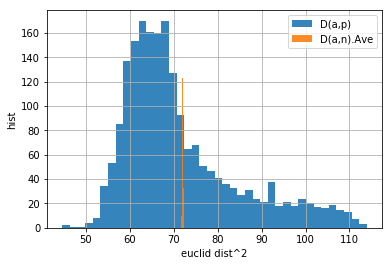

In [18]:
plothist(sim,ave_sim_negative,model=model)

/home/pip/koki_ishizuka/.conda/envs/py35-zukapy/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'hist')

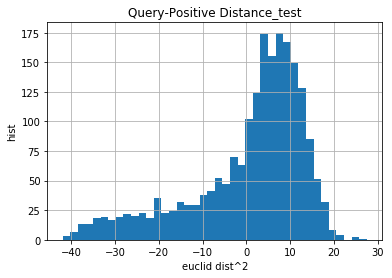

In [19]:
plt.hist(gap,bins=40)
plt.grid('True')
plt.title("Query-Positive Distance_{}".format(model))
plt.xlabel("euclid dist^2")
plt.ylabel("hist")
# plt.savefig('./histgram/avesimNegative_euclid_{}.png'.format(model),dpi=300)

## cos類似度

In [20]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [21]:
sim = []
for q,g in zip(query,gallery):
    sim.append(cos_sim(q,g))

(array([  9.,  18.,  44.,  44.,  40.,  37.,  37.,  56.,  59.,  67.,  57.,
         68.,  78.,  61.,  71.,  85.,  93.,  84.,  82., 101.,  97., 110.,
         98.,  83.,  91., 136., 116.,  87.,  18.,   5.]),
 array([-0.60164762, -0.57375712, -0.54586663, -0.51797613, -0.49008563,
        -0.46219513, -0.43430463, -0.40641413, -0.37852363, -0.35063313,
        -0.32274263, -0.29485214, -0.26696164, -0.23907114, -0.21118064,
        -0.18329014, -0.15539964, -0.12750914, -0.09961864, -0.07172815,
        -0.04383765, -0.01594715,  0.01194335,  0.03983385,  0.06772435,
         0.09561485,  0.12350535,  0.15139585,  0.17928634,  0.20717684,
         0.23506734]),
 <a list of 30 Patch objects>)

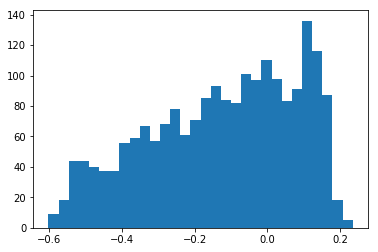

In [22]:
plt.hist(sim,bins=30)

In [20]:
# print(sim)